# Eploratory Data Analysis

### This notebook accomplishes the following:


---

In [2]:
# Imports
import pandas as pd
import numpy as np

### Read in the data files

In [3]:
text_df = pd.read_csv('../data/clean_dnd_zelda.csv')

In [5]:
text_df

,subreddit,title,selftext
0,DMAcademy,Seeking seasoned DMs to be guests on interview...,**Edit (UPDATE): Thank you for the robust resp...
1,DMAcademy,"TERRAIN, and Using it Effectively","TERRAIN, and using it Effectively – DM Tips U..."
2,DMAcademy,Know the exact location of something,The players are planning on dropping an evil a...
3,DMAcademy,How to run military basic as a session,I am running a campaign for all intents and pu...
4,DMAcademy,Best time to take breaks/how long they should be,Hey just a newbie DM .My sessions are usually ...
...,...,...,...
9991,truezelda,Should games such as Tri Force Heroes and Four...,The Zelda timeline is infamous for being convo...
9992,truezelda,Review score predictions for Skyward HD?,Title says it all. How will it fare? With the...
9993,truezelda,Should I watch or play Majora’s Mask?,[deleted]
9994,truezelda,Can anyone help me find a normally priced zeld...,My daughter loves to play super smash bros and...


### Identify potential stopwords

In [35]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [29]:
X = text_df['title'] + ' ' + text_df['selftext']

In [30]:
cvec = CountVectorizer(stop_words='english')
X = cvec.fit_transform(X)

In [31]:
cvec.get_feature_names()[1000:1010]

['ae',
 'aeafdaceafeba',
 'aec',
 'aecfdcadcbfdbfe',
 'aee',
 'aeecvp',
 'aeeh',
 'aegis',
 'aehkjicw',
 'aelfric_']

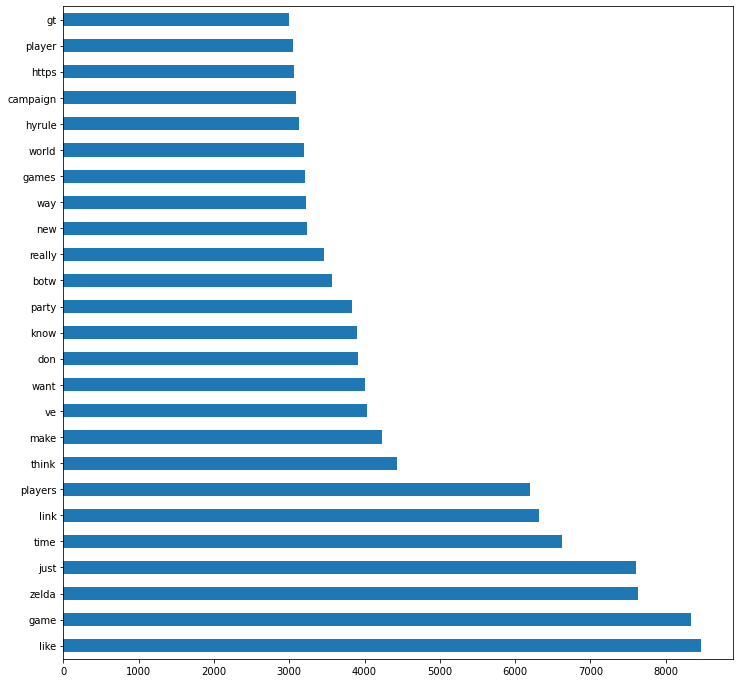

In [36]:
X_df = pd.DataFrame(X.todense(),
                         columns = cvec.get_feature_names())

# plot top occuring words
plt.figure(figsize=(12,12))
X_df.sum().sort_values(ascending=False).head(25).plot(kind='barh');

Game, players, time, and world are a few words that we might consider adding to our stopwords list. These kinds of words might be showing up a lot in each file. Consider checking them against each other. 

In [8]:
letter_words_dict = {'s':[25333,10.6],
'p':[24472,10.3],
'c':[19851,8.37],
'a':[16869,7.11],
'u':[16520,6.97],
't':[12976,5.47],
'm':[12503,5.27],
'b':[11117,4.69],
'd':[11107,4.68],
'r':[9918,4.18],
'h':[9105,3.84],
'i':[8819,3.72],
'e':[8748,3.69],
'o':[7877,3.32],
'f':[7152,3.01],
'g':[6969,2.94],
'n':[6758,2.85],
'l':[6322,2.66],
'w':[4074,1.71],
'v':[3416,1.44],
'k':[2234,0.94],
'j':[1637,0.69],
'q':[1179,0.49],
'z':[963,0.40],
'y':[680,0.28],
'x':[384,0.16]}